In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#from scikitplot.metrics import plot_ks_statistic
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay, f1_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit = pd.read_excel('credit_data.xlsx')

In [3]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [5]:
credit['Job_des'] = credit['Job'].map({0:'unskilled_no_resident',1:'unskilled_resident',2:'skilled',3:'highly_skilled'})

In [6]:
credit.pivot_table(index='Risk',columns='Saving accounts', values='Job_des',aggfunc='count')

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


In [7]:
credit.pivot_table(index='Risk',columns='Checking account', values='Job_des',aggfunc='count')

Checking account,little,moderate,rich
Risk,,,
bad,135,105,14
good,139,164,49


In [8]:
credit['Checking account'] = np.where(credit['Checking account'].isnull(),
                                          np.where(credit['Risk']=='bad','little','moderate'),
                                          credit['Checking account'])

In [9]:
credit['Saving accounts'] = np.where(credit['Saving accounts'].isnull(),
                                          'little',
                                          credit['Saving accounts'])

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Job_des           1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [11]:
cols = list(credit.drop('Risk', axis=1).columns)

In [12]:
cat_cols = list(credit[cols].select_dtypes(include='object').columns)

In [13]:
credit_2 = credit.copy()

In [14]:
def encode_cat(data, columnas_categoricas):
    
    
    for i in columnas_categoricas:
        df2 = pd.get_dummies(data[i], prefix=i)
        data.drop(i, axis=1,inplace=True)
        data = pd.concat([data,df2], axis=1)
    return data

In [15]:
credit_df = encode_cat(credit_2,cat_cols)

In [16]:
X = credit_df.drop(['Risk', 'Job'],axis=1)
y = credit_df['Risk']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=111)

In [18]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

pred_dt = dt.predict(X_test)

In [19]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

         bad       0.46      0.59      0.52        88
        good       0.81      0.71      0.76       212

    accuracy                           0.68       300
   macro avg       0.63      0.65      0.64       300
weighted avg       0.71      0.68      0.69       300



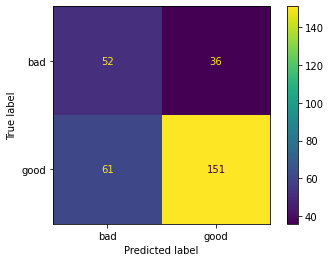

In [20]:
cm = confusion_matrix(y_test,pred_dt)
ConfusionMatrixDisplay(cm, display_labels = dt.classes_).plot()
plt.show()

In [21]:
parametros = {'criterion':['gini','entropy'], 'max_depth':[2,4,6,8,10],'min_samples_split':[2,10,50,100]}

In [22]:
grid = GridSearchCV(DecisionTreeClassifier(), parametros, refit=True, verbose=3, scoring='recall')

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV

[CV 1/5] END criterion=entropy, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_split=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 10, 50, 100]},
             scoring='recall', verbose=3)

In [24]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [25]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [26]:
grid_predictions = grid.predict(X_test)

In [27]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         bad       0.62      0.66      0.64        88
        good       0.85      0.83      0.84       212

    accuracy                           0.78       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.78      0.78      0.78       300



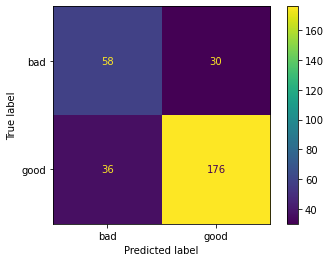

In [28]:
cm = confusion_matrix(y_test,grid_predictions)
ConfusionMatrixDisplay(cm, display_labels = grid.classes_).plot()
plt.show()

In [29]:
dt = DecisionTreeClassifier(max_depth=2)

dt.fit(X_train,y_train)

pred_dt = dt.predict(X_test)

In [30]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         bad       0.62      0.66      0.64        88
        good       0.85      0.83      0.84       212

    accuracy                           0.78       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.78      0.78      0.78       300



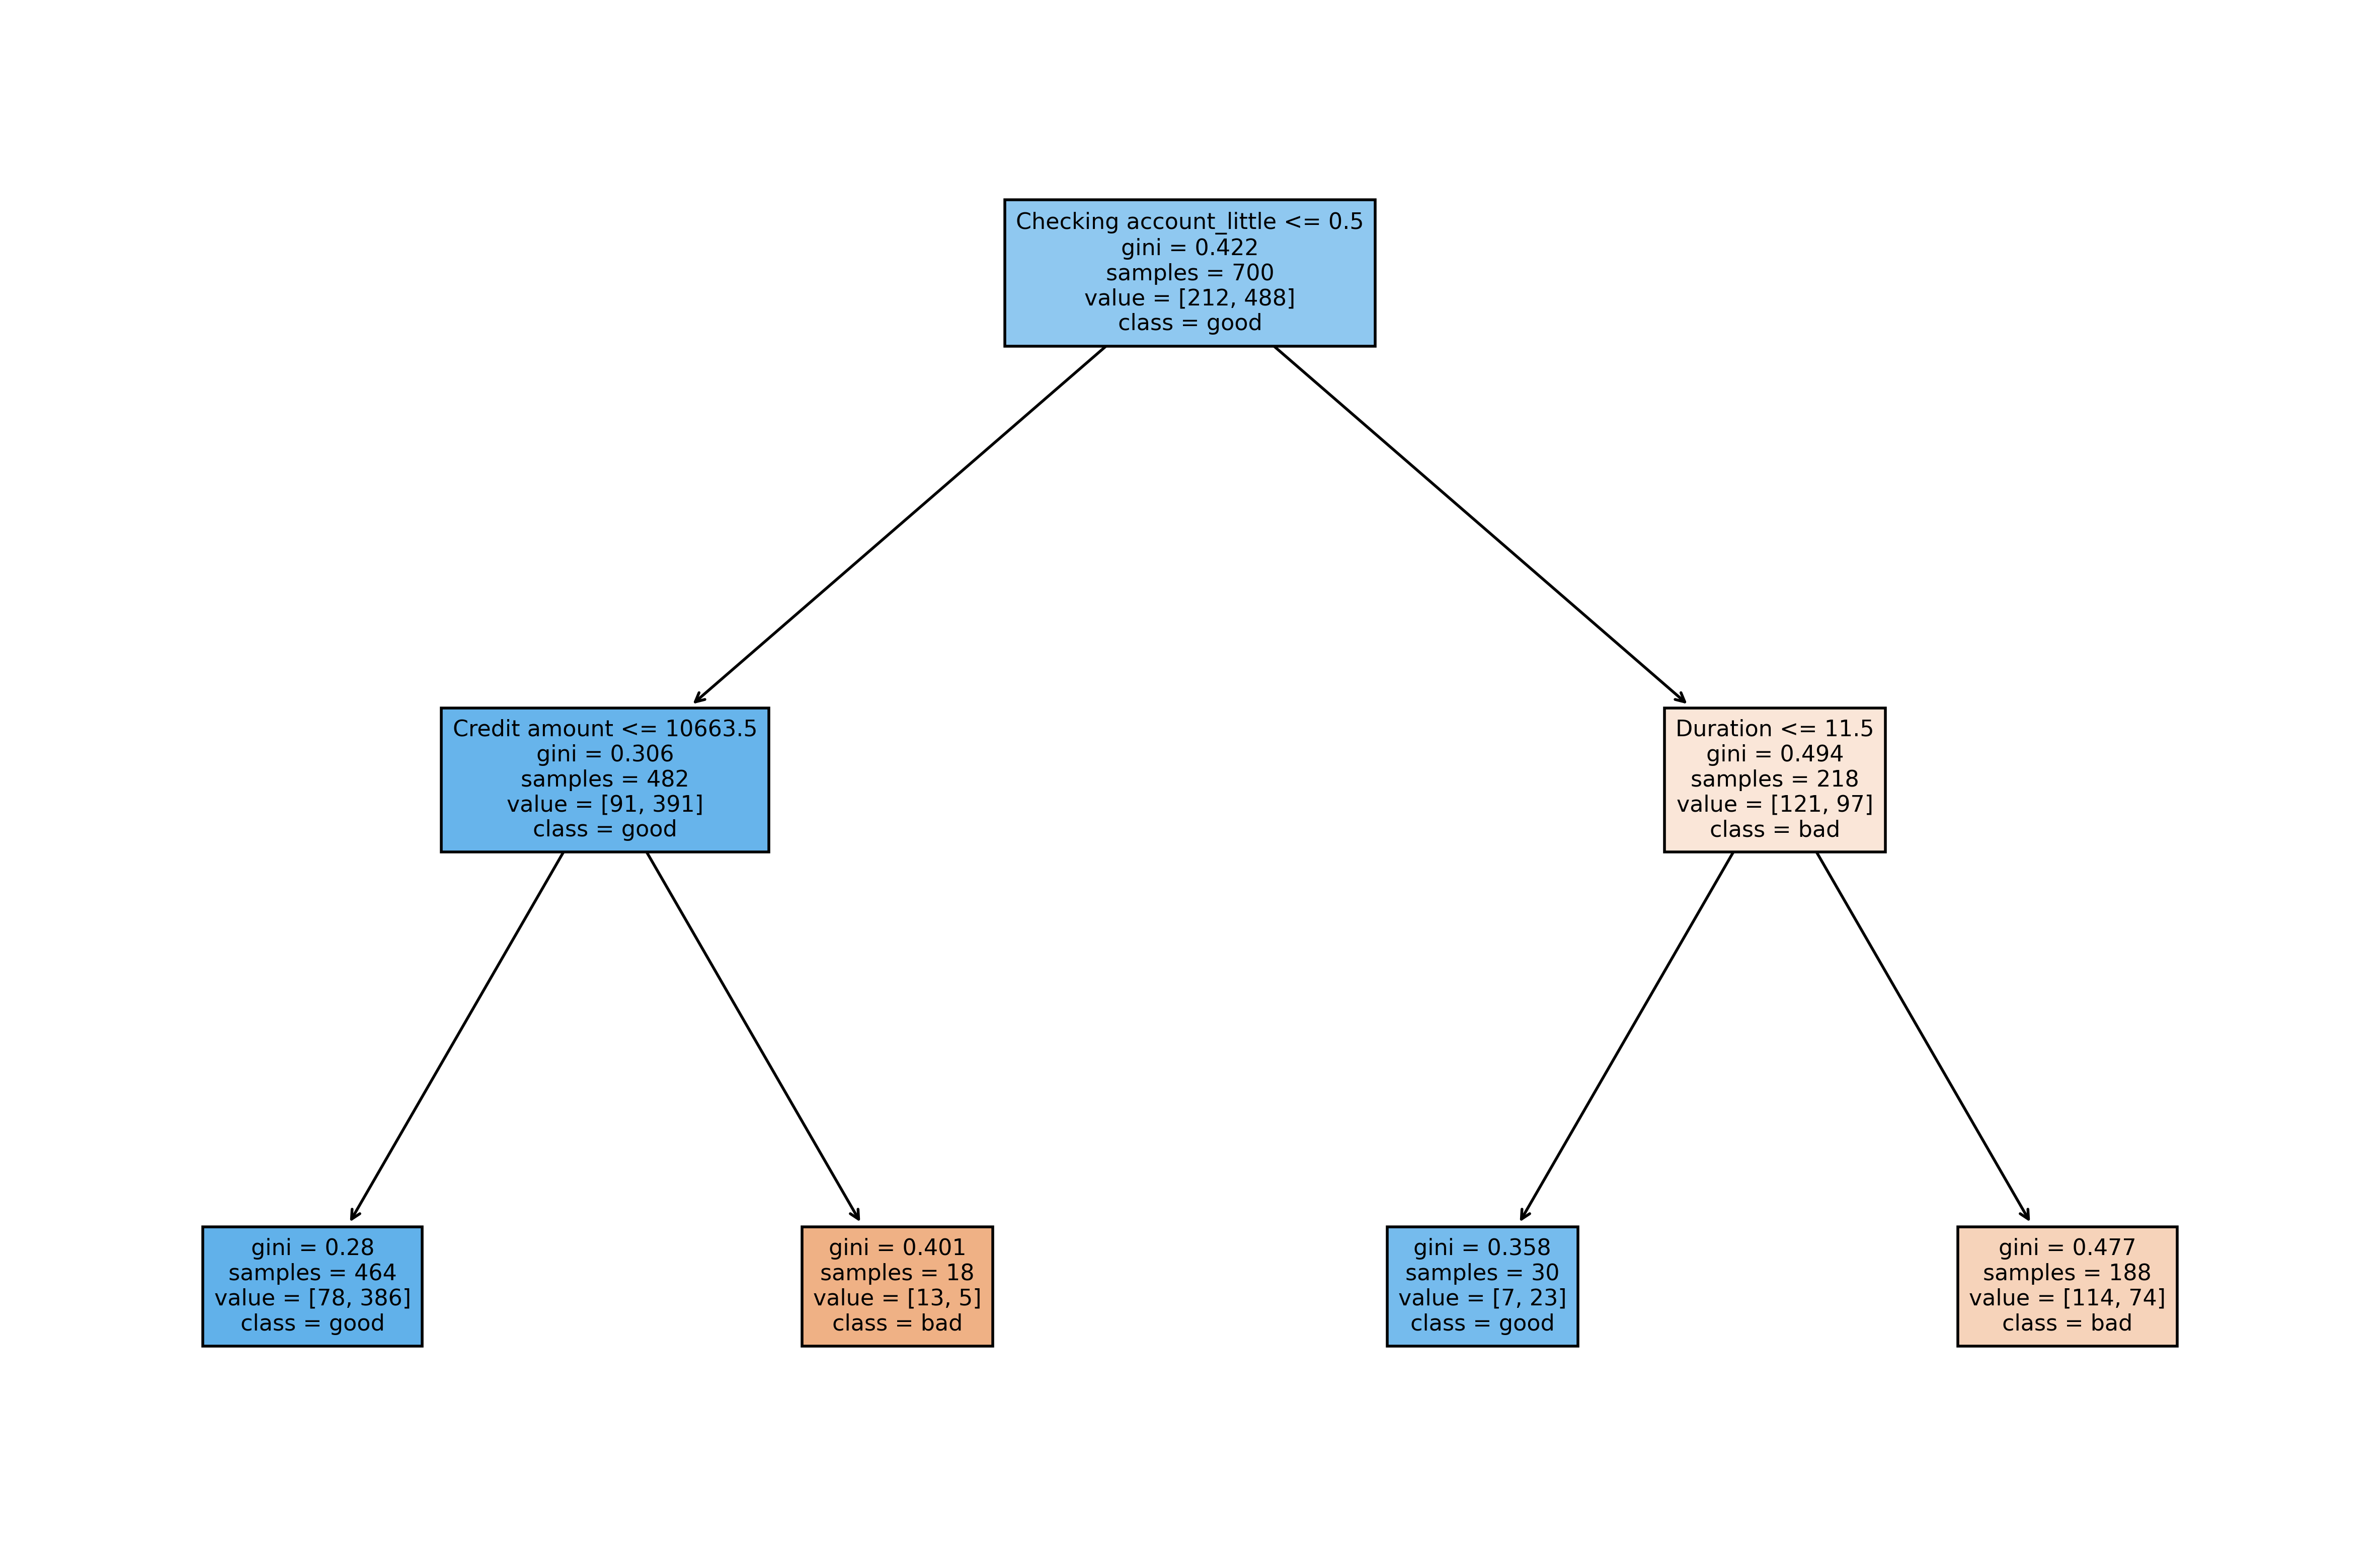

In [31]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=400)
tree.plot_tree(dt,
               feature_names = X.columns.tolist(), 
               class_names=list(dt.classes_),
               filled = True,
              fontsize=8);

In [32]:
result = []

for k in range(2,15):
    sm = SMOTE(k_neighbors=k)
    X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)
    dt_sm = DecisionTreeClassifier(max_depth=2)
    dt_sm.fit(X_train_sm,y_train_sm)
    pred_dt_sm = dt_sm.predict(X_test)
    recall_ = recall_score(y_test,pred_dt_sm, pos_label="bad")
    f1_ = f1_score(y_test,pred_dt_sm, pos_label="bad")
    result.append([recall_,f1_])

In [33]:
result_df = pd.DataFrame(result, columns = ['Recall', 'F1'])

result_df.head()

,Recall,F1
0,0.715909,0.646154
1,0.715909,0.642857
2,0.715909,0.646154
3,0.715909,0.646154
4,0.715909,0.642857


<AxesSubplot:>

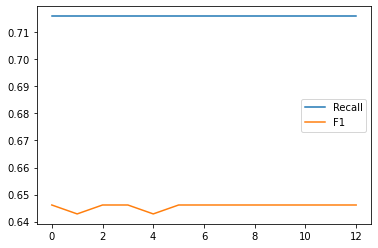

In [34]:
result_df.plot()

In [35]:
sm = SMOTE(k_neighbors=6)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [36]:
dt_sm = DecisionTreeClassifier(max_depth=2)

dt_sm.fit(X_train_sm,y_train_sm)

pred_dt_sm = dt_sm.predict(X_test)

In [37]:
print(classification_report(y_test,pred_dt_sm))

              precision    recall  f1-score   support

         bad       0.59      0.72      0.65        88
        good       0.87      0.79      0.83       212

    accuracy                           0.77       300
   macro avg       0.73      0.75      0.74       300
weighted avg       0.79      0.77      0.78       300



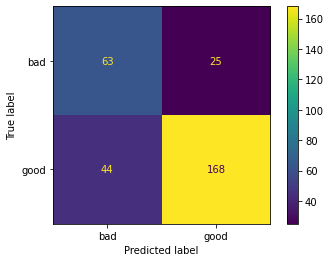

In [38]:
cm = confusion_matrix(y_test,pred_dt_sm)
ConfusionMatrixDisplay(cm, display_labels = dt_sm.classes_).plot()
plt.show()

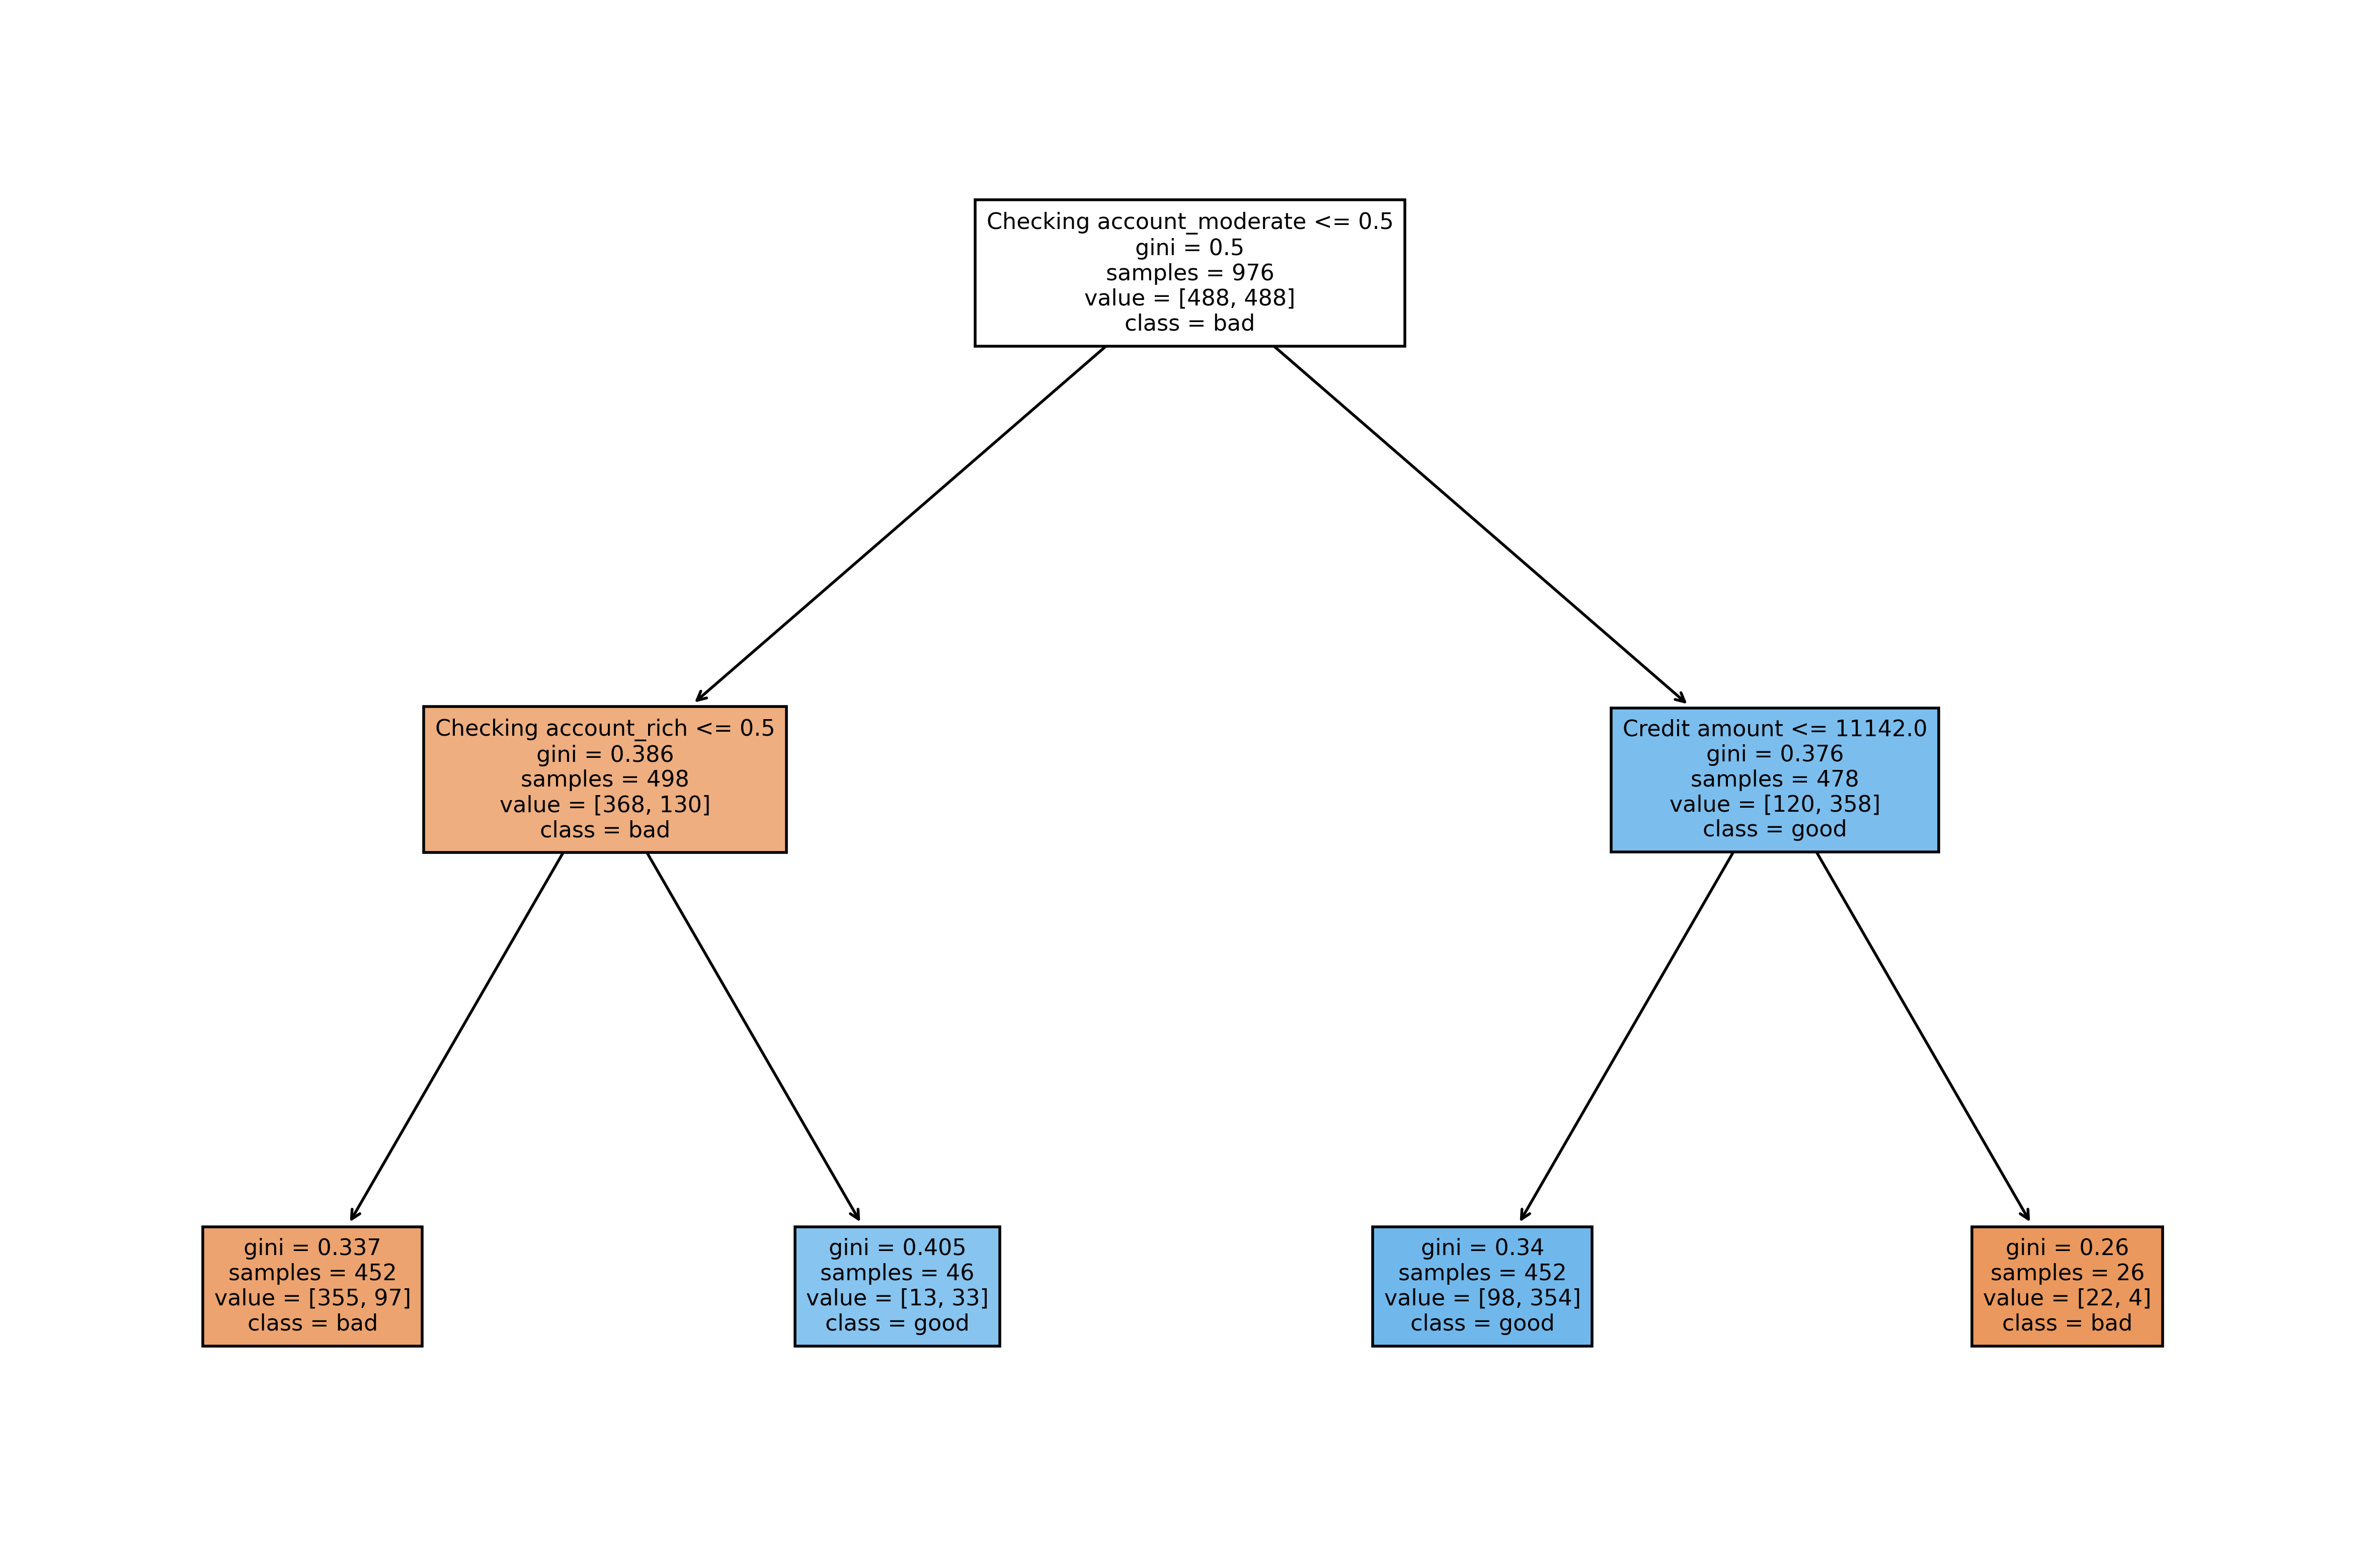

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=400)
tree.plot_tree(dt_sm,
               feature_names = X.columns.tolist(), 
               class_names=list(dt_sm.classes_),
               filled = True,
               fontsize=8);

In [40]:
df_test = pd.DataFrame()
df_test['y_test'] = y_test
df_test['predicciones_test'] = dt_sm.predict(X_test)
df_test['proba_default_test'] = dt_sm.predict_proba(X_test)[:,0]
df_test['proba_no_default_test'] = dt_sm.predict_proba(X_test)[:,1]
df_test['predicciones_test'] = df_test['predicciones_test'].map({'bad':0,'good':1})
df_test['y_test'] = df_test['y_test'].map({'bad':0,'good':1})

In [41]:
print(roc_auc_score(df_test['y_test'],df_test['predicciones_test']))

0.754180960548885


Text(0.5, 1.0, 'ROC curve')

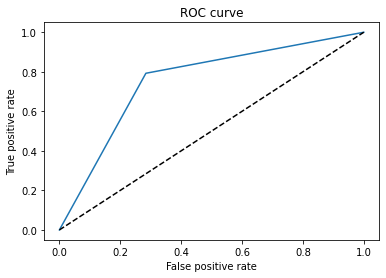

In [42]:
fpr, tpr, thresholds = roc_curve(df_test['y_test'], df_test['predicciones_test'])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color= 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

Text(0.5, 1.0, 'Gini')

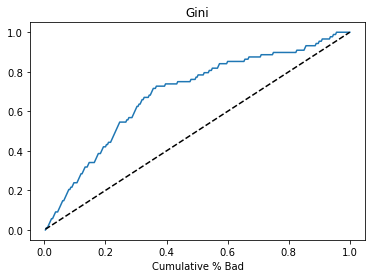

In [43]:
df_gini_test = df_test[['y_test',
                         'proba_no_default_test',
                         'predicciones_test']].sort_values(by='proba_no_default_test')

df_gini_test = df_gini_test.reset_index()
df_gini_test['Cumulative N Population'] = df_gini_test.index + 1
df_gini_test['Cumulative N Good'] = df_gini_test['y_test'].cumsum()
df_gini_test['Cumulative N Bad'] = df_gini_test['Cumulative N Population'] - df_gini_test['y_test'].cumsum()
df_gini_test['Cumulative Perc Population'] = df_gini_test['Cumulative N Population'] / (df_gini_test.shape[0])
df_gini_test['Cumulative Perc Good'] = df_gini_test['Cumulative N Good'] / df_gini_test['y_test'].sum()
df_gini_test['Cumulative Perc Bad'] = df_gini_test['Cumulative N Bad'] / (df_gini_test.shape[0] - df_gini_test['y_test'].sum())
plt.plot(df_gini_test['Cumulative Perc Population'],df_gini_test['Cumulative Perc Bad'])
plt.plot(df_gini_test['Cumulative Perc Population'],df_gini_test['Cumulative Perc Population'], linestyle='--', color='k')
plt.xlabel('Cumulative % Population')
plt.xlabel('Cumulative % Bad')
plt.title('Gini')

In [44]:
Gini_test = (roc_auc_score(df_gini_test['y_test'], df_gini_test['predicciones_test']) * 2) - 1
print(Gini_test)

0.5083619210977699


In [45]:
ks_test = max(df_gini_test['Cumulative Perc Bad'] - df_gini_test['Cumulative Perc Good'])
print(ks_test)

0.5102915951972555


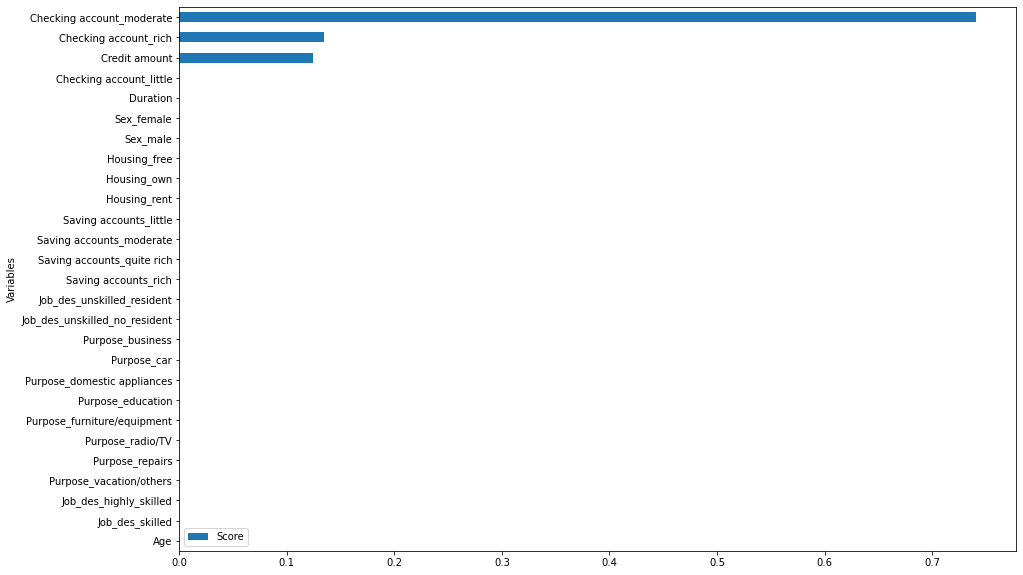

In [46]:
impacto = pd.DataFrame()
impacto['Variables'] = X.columns
impacto['Score'] = dt_sm.feature_importances_
impacto.sort_values(by='Score',ascending=True).plot(x='Variables',y='Score',kind='barh',figsize=(15, 10))

plt.show()

In [47]:
# Full Grown Tree para evaluar importancia

In [48]:
dt = DecisionTreeClassifier()

dt.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

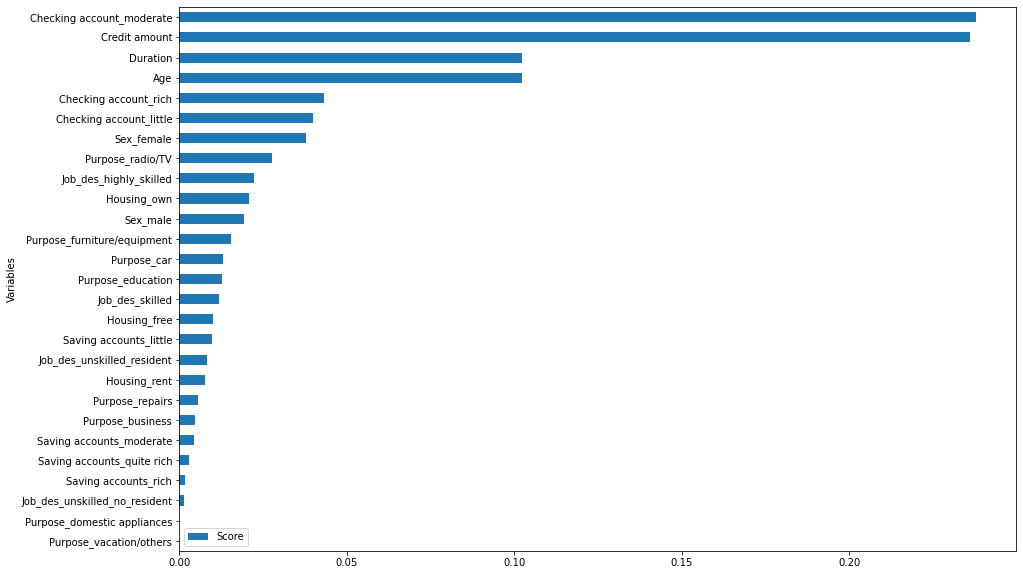

In [49]:
impacto = pd.DataFrame()
impacto['Variables'] = X.columns
impacto['Score'] = dt.feature_importances_
impacto.sort_values(by='Score',ascending=True).plot(x='Variables',y='Score',kind='barh',figsize=(15, 10))

plt.show()